In [137]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pathlib
import os
import pandas as pd
import re
from preprocessing_util_functions import extract_event_ids, extract_event_days

ImportError: cannot import name 'extract_event_ids' from 'preprocessing_util_functions' (C:\Users\shubham mate\Desktop\Programming\Python\South Africa Flood Mapping\preprocessing_util_functions.py)

In [2]:
# Set the variables for path of dataset

data_path = pathlib.Path(os.path.abspath('')) / "Resources"
composite_images_path = data_path / "composite_images.npz"
train_df_path = data_path / 'train.csv'
test_df_path = data_path / 'test.csv'

In [27]:
# Load Images

composite_images = np.load(composite_images_path)
lst = composite_images.files
temp_list_for_range = []
print(len(lst))
for item in lst:
    print(item)
    temp_list_for_range.append(np.amax(np.amax(composite_images[item], axis=0), axis=0))
    print(composite_images[item].shape)
    break

temp_list_for_range = np.array(temp_list_for_range)

898
id_rhg5w8vmv3ny
(128, 128, 6)


In [25]:
# Max value of each channel in the entire dataset
np.amax(temp_list_for_range, axis=0)

array([ 6022,  6369, 10825,  9659,  6589, 55737], dtype=uint16)

In [4]:
train_df = pd.read_csv(train_df_path)
test_df = pd.read_csv(test_df_path)
train_df

,event_id,precipitation,label
0,id_spictby0jfsb_X_0,0.000000,0
1,id_spictby0jfsb_X_1,0.095438,0
2,id_spictby0jfsb_X_2,1.949560,0
3,id_spictby0jfsb_X_3,3.232160,0
4,id_spictby0jfsb_X_4,0.000000,0
...,...,...,...
492015,id_p8f40663jj3g_X_725,0.000000,0
492016,id_p8f40663jj3g_X_726,0.000000,0
492017,id_p8f40663jj3g_X_727,0.000000,0
492018,id_p8f40663jj3g_X_728,0.000000,0


In [5]:
test_df

,event_id,precipitation
0,id_j7b6sokflo4k_X_0,0.00000
1,id_j7b6sokflo4k_X_1,3.01864
2,id_j7b6sokflo4k_X_2,0.00000
3,id_j7b6sokflo4k_X_3,16.61520
4,id_j7b6sokflo4k_X_4,2.56706
...,...,...
163515,id_u7z6uy4xdc9w_X_725,0.00000
163516,id_u7z6uy4xdc9w_X_726,0.00000
163517,id_u7z6uy4xdc9w_X_727,0.00000
163518,id_u7z6uy4xdc9w_X_728,0.09807


In [69]:
train_df['event_day_extracted'] = train_df['event_id'].apply(extract_event_day)
test_df['event_day_extracted'] = test_df['event_id'].apply(extract_event_day)

train_df['event_id_extracted'] = train_df['event_id'].apply(extract_event_id)
test_df['event_id_extracted'] = test_df['event_id'].apply(extract_event_id)
train_df

,event_id,precipitation,label,event_id_extracted,event_day_extracted
0,id_spictby0jfsb_X_0,0.000000,0,id_spictby0jfsb,0
1,id_spictby0jfsb_X_1,0.095438,0,id_spictby0jfsb,1
2,id_spictby0jfsb_X_2,1.949560,0,id_spictby0jfsb,2
3,id_spictby0jfsb_X_3,3.232160,0,id_spictby0jfsb,3
4,id_spictby0jfsb_X_4,0.000000,0,id_spictby0jfsb,4
...,...,...,...,...,...
492015,id_p8f40663jj3g_X_725,0.000000,0,id_p8f40663jj3g,725
492016,id_p8f40663jj3g_X_726,0.000000,0,id_p8f40663jj3g,726
492017,id_p8f40663jj3g_X_727,0.000000,0,id_p8f40663jj3g,727
492018,id_p8f40663jj3g_X_728,0.000000,0,id_p8f40663jj3g,728


In [70]:
train_df['event_id_extracted'].value_counts(), test_df['event_id_extracted'].value_counts()

(event_id_extracted
 id_spictby0jfsb    730
 id_ziwft2t934pz    730
 id_hdm5dhxfdwyq    730
 id_v4ffn6pvh7ux    730
 id_te4q36q1dftd    730
                   ... 
 id_y2mkd77eqcyr    730
 id_fvd2vpsr03ju    730
 id_t1w6uausjdm9    730
 id_8v312xxv5o53    730
 id_p8f40663jj3g    730
 Name: count, Length: 674, dtype: int64,
 event_id_extracted
 id_j7b6sokflo4k    730
 id_6x9vvppgp5l3    730
 id_fah95yzf4v7j    730
 id_2fm0hnopz5pt    730
 id_n1e955m5lwl7    730
                   ... 
 id_f5e7zme7gqnb    730
 id_1uehxi92ddcj    730
 id_g0ydhtmd4ogx    730
 id_neahwa8vttvu    730
 id_u7z6uy4xdc9w    730
 Name: count, Length: 224, dtype: int64)

# Description of data

The dataset contains 898 locations in South Africa. For each location, an Multispectral Image from Sentinel 2 Satellite is provided, along with topological image data for slope from NASA SMRT is also given (1 image with 6 channels in total for each location).

### Information and Pixel Range of each channel:
The range of the bands of Sentinel 2 were obtained from [here](https://documentation.dataspace.copernicus.eu/Data/SentinelMissions/Sentinel2.html#sentinel-2-level-3-quarterly-mosaics)

 * B2 (Blue): 0-10000 
 * B3 (Green): 0-10000
 * B4 (Red): 0-10000
 * B8 (Near Infrared): 0-10000
 * B11 (Short-wave Infrared): 0-10000
 * Slope: 0-65,535 (uint16)

### Percipitation Time Series:
Along with an image for each location, the recorded percipitation data for each location, in a 5km radius, for 760 days has been provided. For each day, an event feature is given, which is our target feature.
  * event 0: No flood occurred that day in that location
  * event 1: flood occurred that day in that location

### Train - Test split:
 * Train: 674
 * Test: 224

In [125]:
# Split event ids according to train and test
train_ids = train_df['event_id_extracted'].unique()
test_ids = test_df['event_id_extracted'].unique()
rescaling_factor = np.array([10000, 10000, 10000, 10000, 10000, 65535])

## Visualising the Data

In [134]:
def plot_image(id):
    composite_image = composite_images[id]
    composite_image = composite_image.astype(np.float32)
    composite_image /= rescaling_factor
    fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(20, 15))
    ax[0].imshow(np.flip(composite_image[:, :, 0:3], axis=-1), cmap='viridis', interpolation='nearest')
    for i in range(1, 7):
        ax[i].imshow(composite_image[:, :, i-1], cmap='gray', interpolation='nearest')


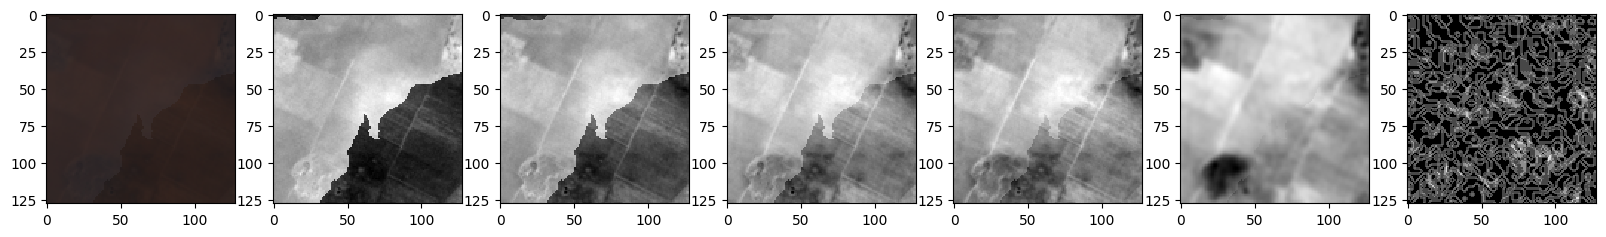

In [136]:
plot_image(train_ids[1])